<a href="https://colab.research.google.com/github/aryamanak10/GRIP-The-Sparks-Foundation-Internship/blob/master/Task%204/To_Explore_the_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intern Name: Aryaman S. Kakad

## Task 4 - To explore the Decision Tree Algorithm

* For the given **'Iris'** dataset, create the **Decision Tree Classifier** and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Ignore the Warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Importing the Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Reading the Dataset

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
# Displaying the first five rows

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Displaying the last five rows

df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Renaming the columns

In [6]:
df=df.rename(columns={'SepalLengthCm':'Sepal_Length',
                      'SepalWidthCm':'Sepal_Width',
                      'PetalLengthCm':'Petal_Length',
                      'PetalWidthCm':'Petal_Width'})

In [7]:
df.head()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal_Length  150 non-null    float64
 2   Sepal_Width   150 non-null    float64
 3   Petal_Length  150 non-null    float64
 4   Petal_Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* There are **four numerical features** and **one categorical feature**.There are totally **150 rows or observations** in this dataset.

#### Checking for NAN values

In [9]:
df.isna().sum()

Id              0
Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

In [10]:
df.notna().all(axis=0)

Id              True
Sepal_Length    True
Sepal_Width     True
Petal_Length    True
Petal_Width     True
Species         True
dtype: bool

#### Shape of the Dataset

In [11]:
df.shape

(150, 6)

#### Statistical Description of the Data

In [12]:
df.describe()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Correlation Matrix

In [13]:
df.corr()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
Sepal_Length,0.716676,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.882747,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.899759,0.817954,-0.356544,0.962757,1.000000


#### Unique labels of the Species feature

In [14]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Different Types of Visualizations of the Data

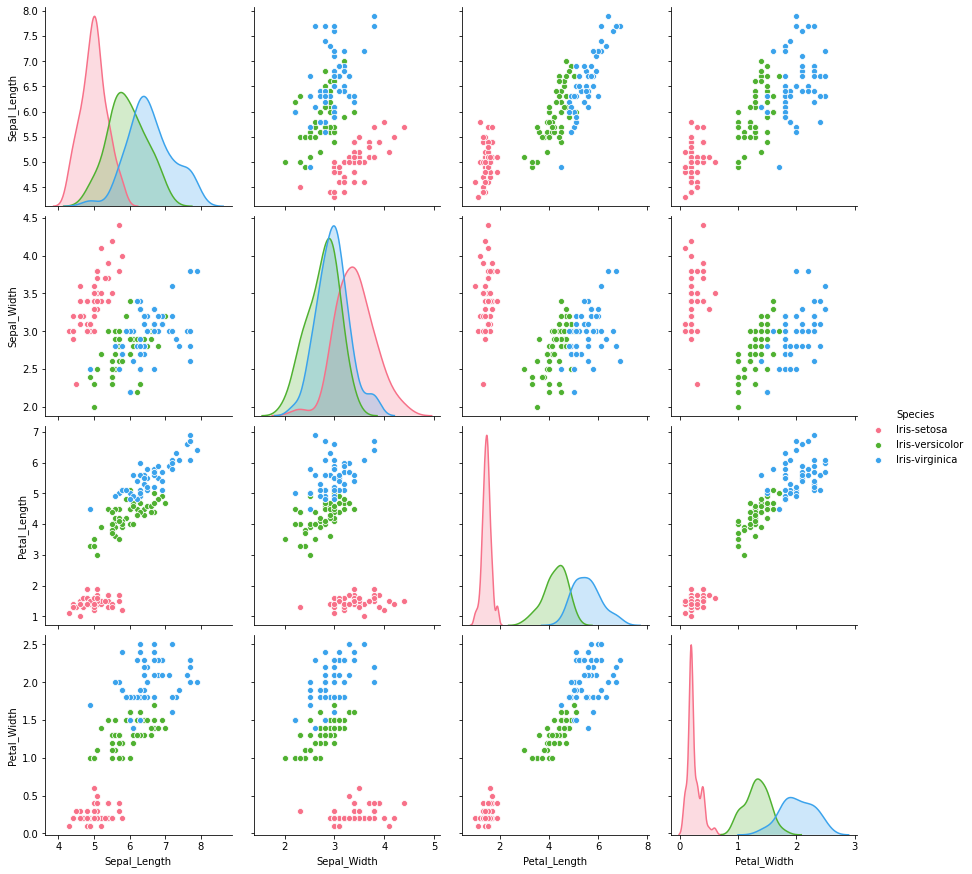

In [15]:
sns.pairplot(df.drop('Id',axis=1), hue="Species", palette="husl", height=3, diag_kind='kde')

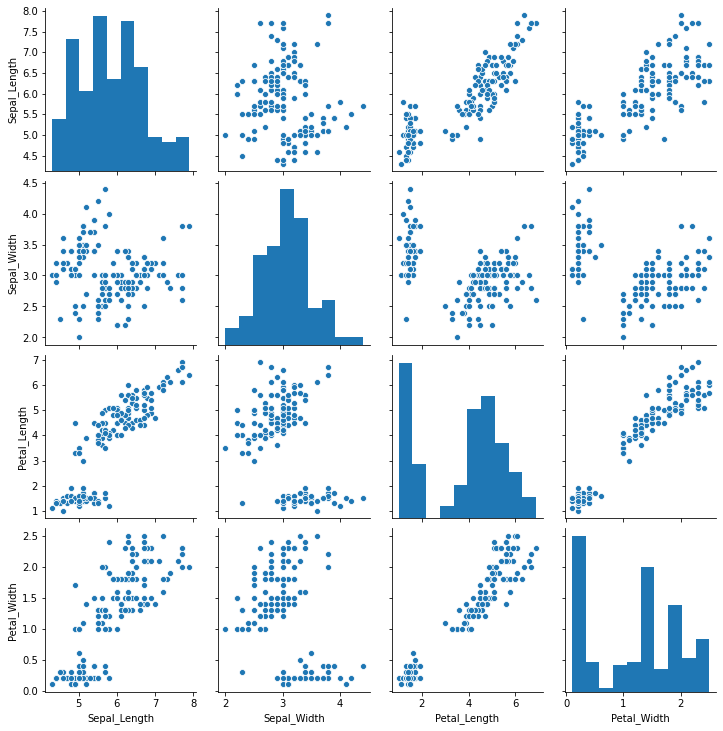

In [16]:
sns.pairplot(df.drop('Id',axis=1))

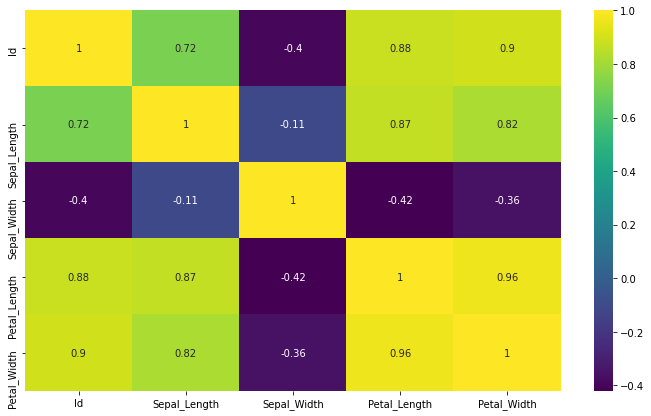

In [17]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

### Checking for any outliers

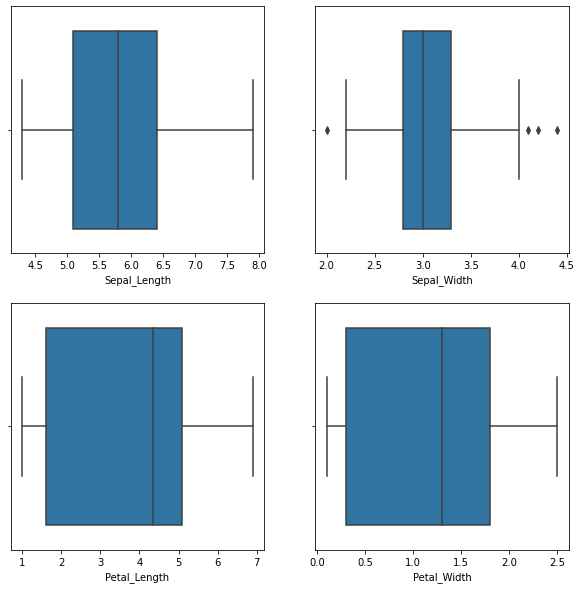

In [18]:
plt.figure(figsize = (10,10))
feature = df.columns[1:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(df[i[1]])

* **INFERENCE**: The only dependent feature that contains outliers is the Sepal Width, to overcome this issue we will use **Capping** 

### Capping the Sepal_Width feature

In [19]:
q1 = df['Sepal_Width'].quantile(0.01)
q4 = df['Sepal_Width'].quantile(0.99)

df['Sepal_Width'][df['Sepal_Width']<= q1] = q1
df['Sepal_Width'][df['Sepal_Width']>= q4] = q4

## Creating the Decision Tree Classifier Model

### Defining the Dependent and Independet Features

In [20]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1].values

### Splitting the dataset into training and testing set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Scaling the Data

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the Decision Tree Classification model on the Training set

In [23]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Predicting the test set results

In [24]:
y_pred = classifier.predict(X_test)

### Actual and Predicted Values

In [25]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_results.head()

,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa


## Evaluation of the Model

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

print(f'Accuracy: {accuracy_score(y_test,y_pred)}\nConfusion Matrix:-\n{confusion_matrix(y_test,y_pred)}\nClassification Report:-\n{classification_report(y_test,y_pred)}\n')

Accuracy: 0.9736842105263158
Confusion Matrix:-
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report:-
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38




### Optimizing the Classifier Model

In [27]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10,
              random_state=0)

cvs = cross_val_score(classifier,
                      X_train,
                      y_train,
                      cv=kfold,
                      scoring='accuracy')

print(f'Max Accuracy-:{max(cvs)*100} Avg.Accuracy-:{cvs.mean()*100:3f}%  Std-:{cvs.std()*100:3f}%')

Max Accuracy-:100.0 Avg.Accuracy-:94.696970%  Std-:4.338734%


## Visualising the Decision Tree Classifier Model

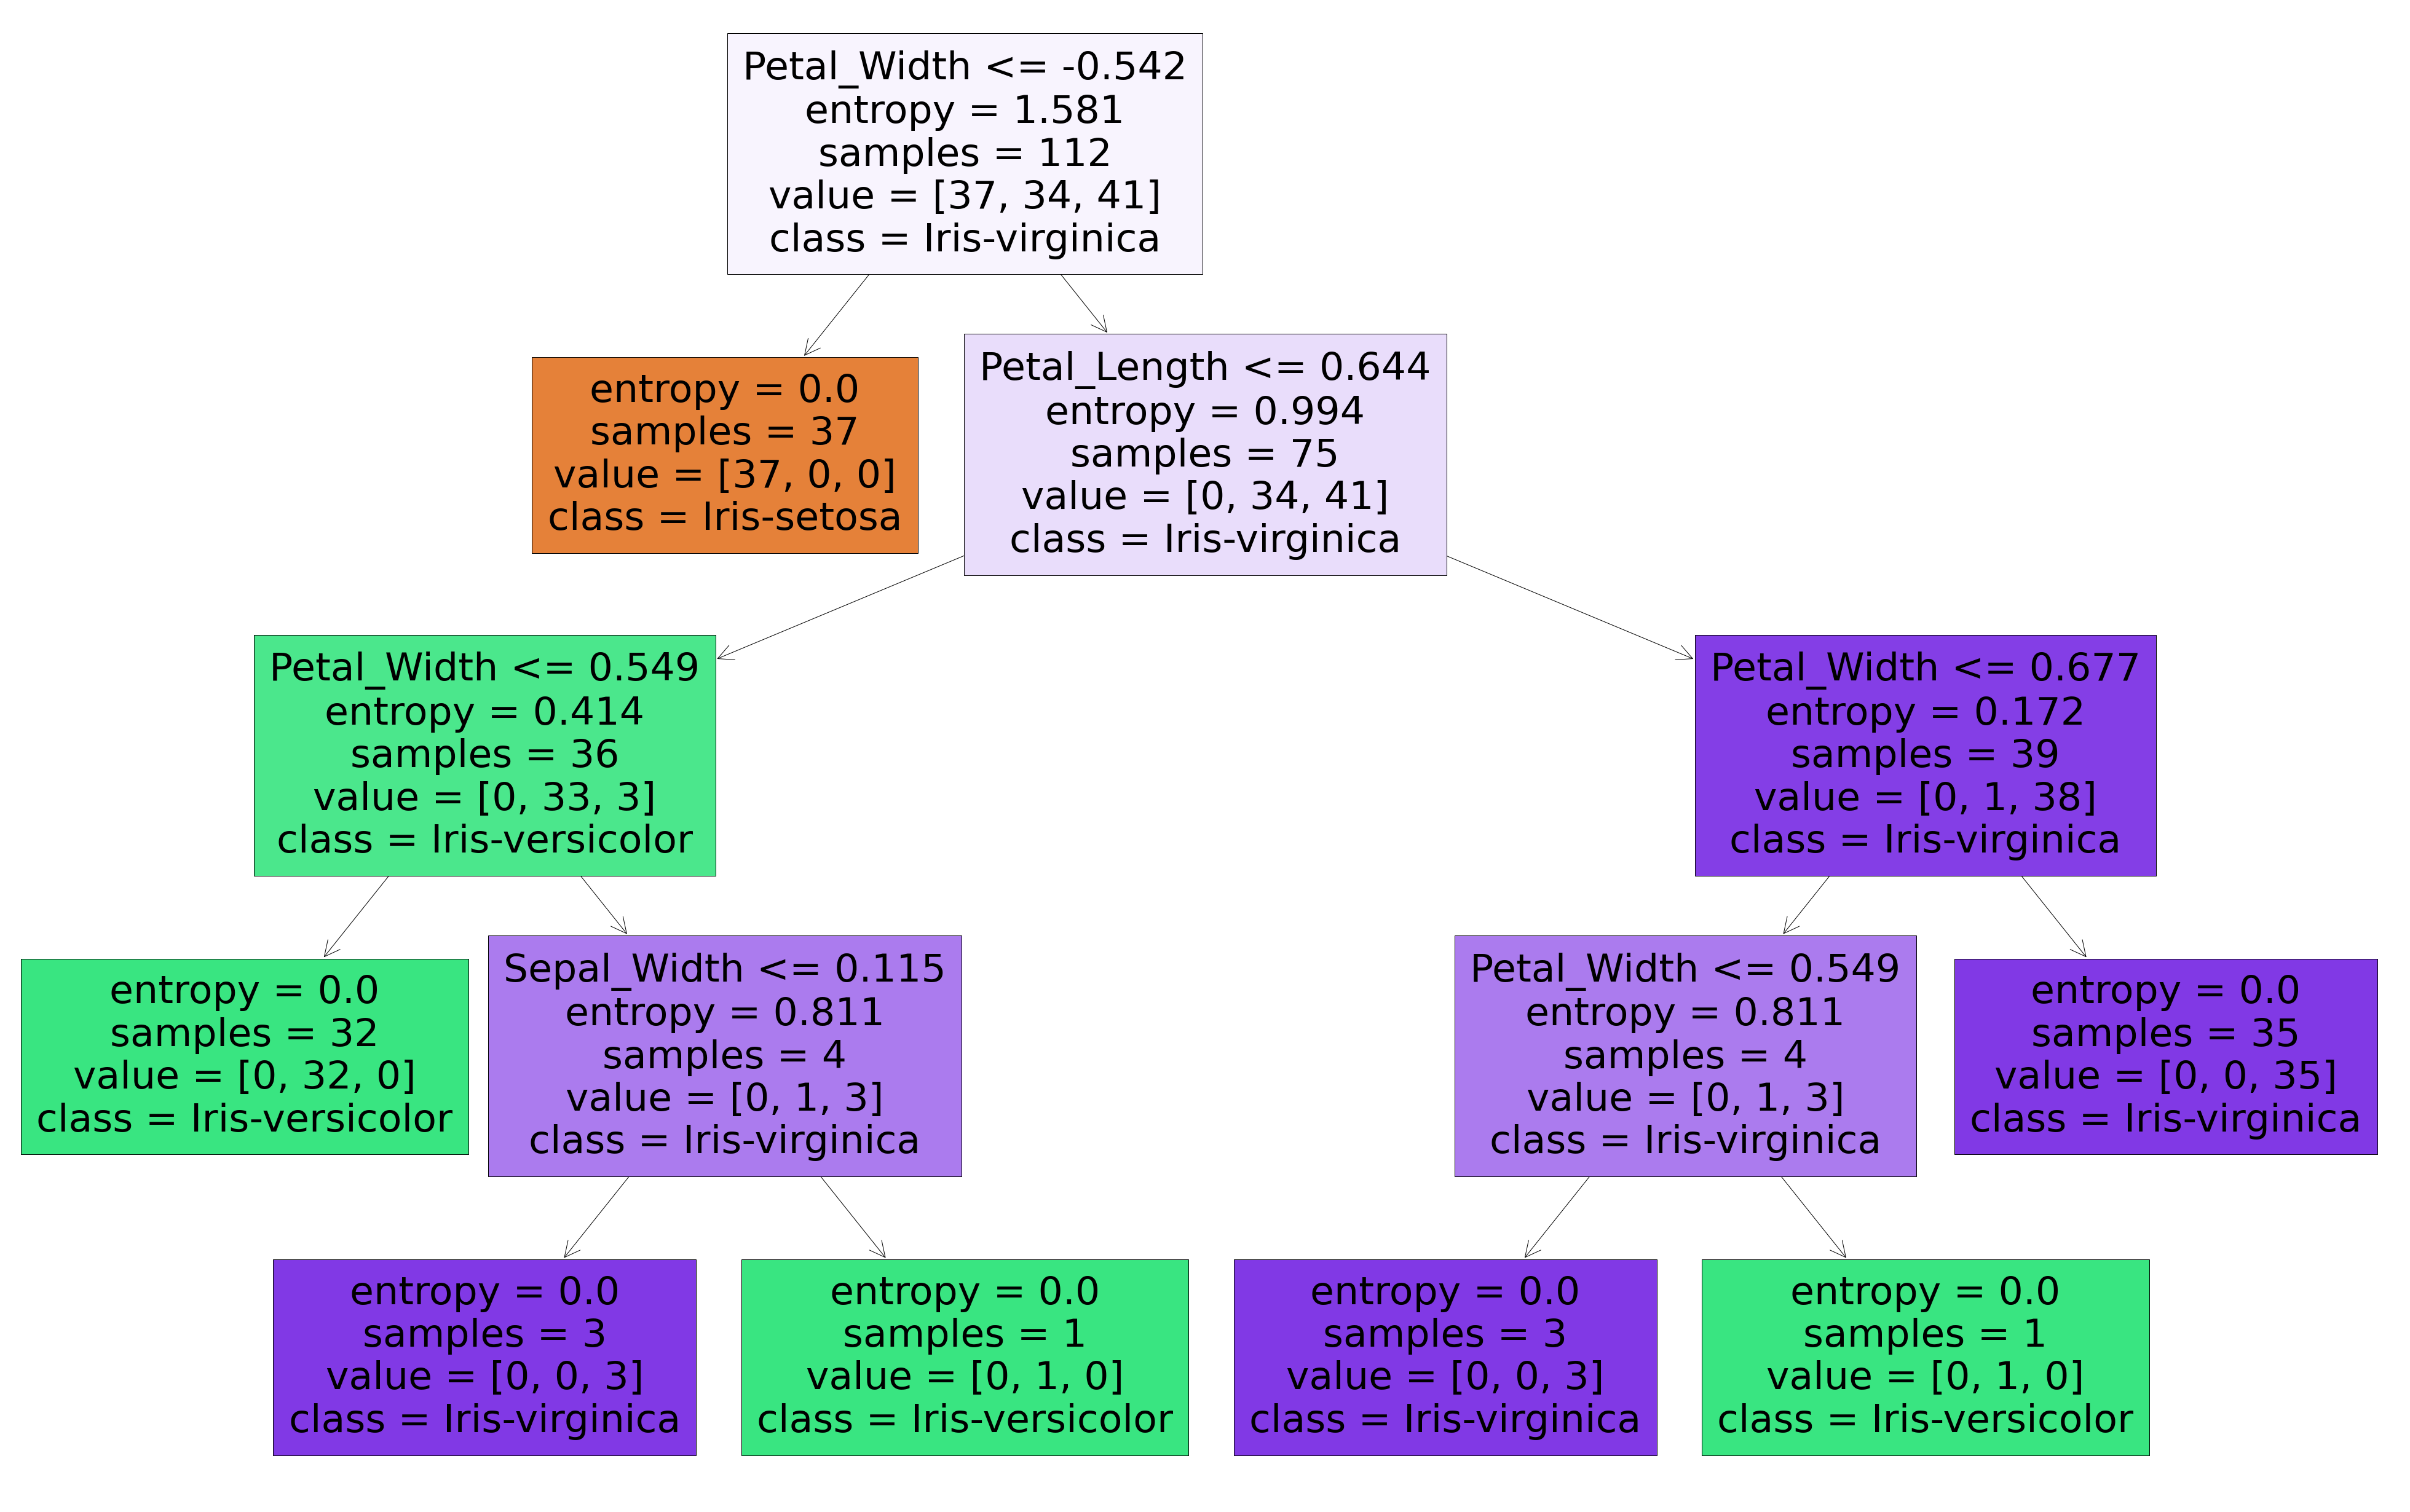

In [28]:
import matplotlib.pyplot as plt
from sklearn import tree

feature_names=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
features_names = list(df.columns[:4])

from sklearn.tree import plot_tree
plt.figure(figsize=(70,45))
plot_tree(classifier,feature_names=feature_names,class_names=class_names,filled=True);

### Prediction for a random sample

The record used for the prediction has the following dependent feature variables.

  * Sepal Length = 3
  * Sepal Width = 5
  * Petal Length = 4
  * Petal Width = 2

### **NOTE**: Always scale the testing data point because you have scaled the original data set and the conditions in the decision tree are based on that values.

In [29]:
test_point = sc.transform([[3, 5, 4, 2]])
test_point

array([[-3.32782459,  4.59649493,  0.11355956,  0.99809808]])

In [30]:
classifier.predict(test_point)

array(['Iris-versicolor'], dtype=object)

#### Testing the Model with a data point in the original data set

In [31]:
df.head()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
data_point = sc.transform([[5.1, 3.5, 1.4, 0.2]])
data_point

array([[-0.90683992,  1.05828331, -1.33681519, -1.31208072]])

In [33]:
classifier.predict(data_point)

array(['Iris-setosa'], dtype=object)